I am yet to be verified by twitter for my developer account and in other to meet up for my Data wrangling task, i downloaded the json file from the class room.

# Table of Content
1. [Importing of Libraries](#import)

2. [Data Gathering](#gathering)

3. [Data Assessment](#assessment)

4. [Data Cleaning](#cleaning)

    4.1 [Quality issues](#quality)
    
    4.2 [Tidiness issues](#tidiness)
    
5. [Storing cleaned Data](#store)

6. [Analyzing and Visualization](#analyzing)

    6.1 [Top 10 most Popular Dog name](#popular)
    
    6.2 [Most Tweeting Source](#tweet-source)
    
    6.3 [Correlation between Retweet and Favourite count](#correlation)

## Importing Libraries <a class="anchor" id="import"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from IPython.display import Image

## Data Gathering <a class="anchor" id="gathering"></a>

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#downloading image prediction file 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
images = requests.get(url)

# storing our downloaded image predictions in a file
with open('image_predictions.tsv', 'wb') as f:
    f.write(images.content)

In [4]:
# reading the image file as a pandas Dataframe
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
# storing json useful information of json file in a list of dictionary

json_tweet_list =[]

for files in open('tweet_json.txt'):
    tweets = json.loads(files)
    json_tweet_list.append({'tweet_id' : tweets['id'],
                              'followers_count' : tweets['user']['followers_count'],
                              'retweet_count' : tweets['retweet_count'],
                              'favourite_count' : tweets['favorite_count']
                             })
    

In [6]:
# craeting a pandas data frame by converting our json list

API_tweets = pd.DataFrame(json_tweet_list)

## Data Assessment <a class="anchor" id="assessment"></a>

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [14]:
twitter_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive.describe(include='all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2017-03-06 19:21:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Horace. He was practicing his levitation,...",NaN,NaN,2016-08-08 17:19:51 +0000,https://twitter.com/dog_rates/status/679462823...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


In [10]:
twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Ron          1
Gert         1
Rambo        1
Pavlov       1
Jerome       1
Name: name, Length: 957, dtype: int64

In [11]:
# checking for missing values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
twitter_archive['source']

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
# printing out four sample of our image predictions dataset
image_predictions.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,0.190142,False,wig,0.034510,False
1467,778748913645780993,https://pbs.twimg.com/media/Cs6r_-kVIAALh1p.jpg,1,Staffordshire_bullterrier,0.351434,True,boxer,0.201478,True,American_Staffordshire_terrier,0.142838,True
463,674999807681908736,https://pbs.twimg.com/media/CV4UvgNUkAEEnZd.jpg,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan_coonhound,0.078602,True


In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_predictions.describe(include='all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


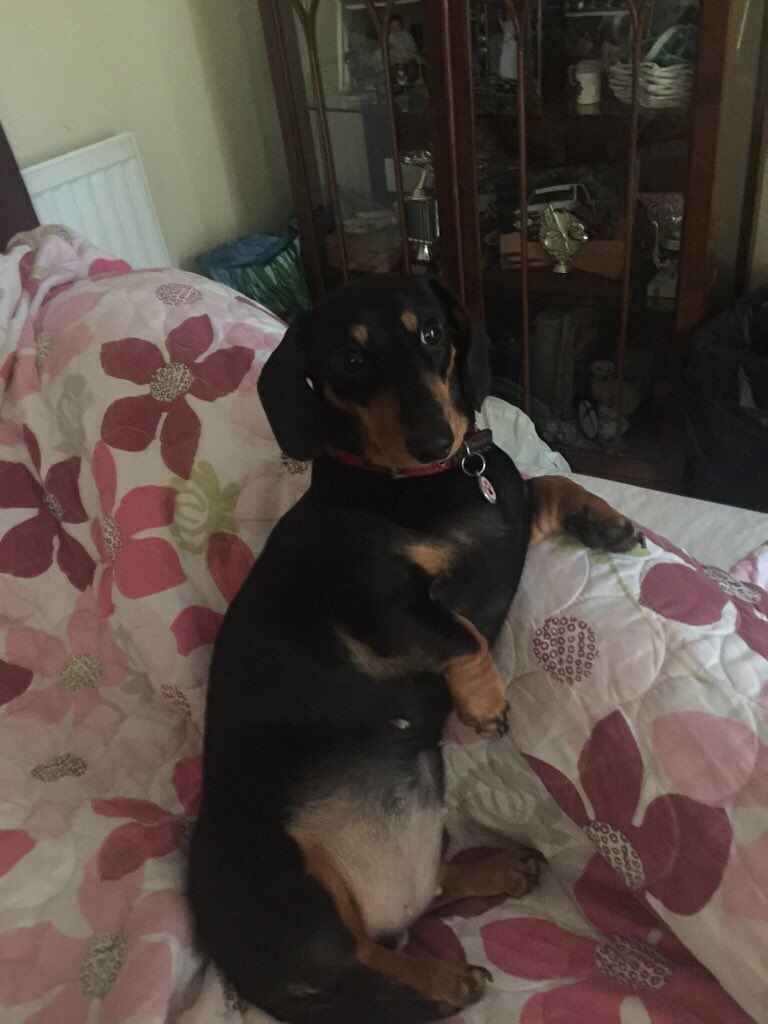

In [21]:
# sample of dog from the dataset with id 666049248165822465
Image('https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg')

In [22]:
# checking for duplicate values
image_predictions.duplicated().sum()

0

In [23]:
# checking for missing values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [24]:
API_tweets

,tweet_id,followers_count,retweet_count,favourite_count
0,892420643555336193,3200889,8853,39467
1,892177421306343426,3200889,6514,33819
2,891815181378084864,3200889,4328,25461
3,891689557279858688,3200889,8964,42908
4,891327558926688256,3200889,9774,41048
...,...,...,...,...
2349,666049248165822465,3201018,41,111
2350,666044226329800704,3201018,147,311
2351,666033412701032449,3201018,47,128
2352,666029285002620928,3201018,48,132


In [25]:
API_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2354 non-null   int64
 1   followers_count  2354 non-null   int64
 2   retweet_count    2354 non-null   int64
 3   favourite_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [26]:
API_tweets.describe(include='all')

,tweet_id,followers_count,retweet_count,favourite_count
count,2.354000e+03,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3.200942e+06,3164.797366,8080.968564
std,6.852812e+16,4.457302e+01,5284.770364,11814.771334
min,6.660209e+17,3.200799e+06,0.000000,0.000000
25%,6.783975e+17,3.200898e+06,624.500000,1415.000000
50%,7.194596e+17,3.200945e+06,1473.500000,3603.500000
75%,7.993058e+17,3.200953e+06,3652.000000,10122.250000
max,8.924206e+17,3.201018e+06,79515.000000,132810.000000


In [27]:
# checking for missing values

API_tweets.isnull().sum()

tweet_id           0
followers_count    0
retweet_count      0
favourite_count    0
dtype: int64

## Data Cleaning <a class="anchor" id="cleaning"></a>

### Quality
- Source column is represented in HTML format instead of string
- Incorrect dog name
- Tweet id should be as string not int
- Convert timestamp to datetime
- Convert rating numerator and denominator to float
- Update rating_numerator column with right data
- Delete retweets
- Some columns will not play a role in our analysis, so we need to drop them across all dataset

### Tidiness
- API tweets, Image prediction and Twitter archive tables should be merged as a single dataset on twitter_id cplumn.
- We could have one column dog_type and merge doggo, floofer, pupper and puppo into it.

In [57]:
# before we begin cleaning, let us make a copy of our dataset
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_predictions.copy()
API_tweets_clean = API_tweets.copy()

### Quality <a class="anchor" id="quality"></a>

#### Define
- Source column is represented in HTML format instead of string

#### code

In [58]:

twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('>([\w\W\s]*)<', expand=True)

#### test

In [59]:
twitter_archive_clean['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2356, dtype: object

Ref : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html

#### Define
- Incorrect dog name

#### Code

In [60]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].str.replace('^[a-z]+', 'None')

#### Test

In [61]:
twitter_archive_clean['name'].value_counts()

None       854
Charlie     12
Oliver      11
Lucy        11
Cooper      11
          ... 
Noah         1
Ron          1
Gert         1
Rambo        1
Jerome       1
Name: name, Length: 932, dtype: int64

#### Define
- change twitter_id datatype from int to string across all dataset

#### Code

In [62]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype(str)
API_tweets_clean['tweet_id'] = API_tweets_clean['tweet_id'].astype(str)

#### Test

In [63]:
print(f"twitter arcive -----------------{twitter_archive_clean['tweet_id'].dtypes}")
print(f"Image prediction -----------------{image_prediction_clean['tweet_id'].dtypes}")
print(f"API tweets -----------------{API_tweets_clean['tweet_id'].dtypes}")

twitter arcive -----------------object
Image prediction -----------------object
API tweets -----------------object


#### Define
- Convert timestamp to datetime

#### Code

In [64]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [65]:
twitter_archive_clean['timestamp'].dtypes

datetime64[ns, UTC]

#### Define
- convert rating numerator and denominator to float

#### Code

In [66]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

#### Test

In [67]:
twitter_archive_clean['rating_numerator'].dtypes
twitter_archive_clean['rating_denominator'].dtypes

dtype('float64')

#### Define
- Delete retweets

#### Code

In [68]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [69]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   float64         

#### Define
- numerator column with wrong ratings

#### Code

In [70]:
import re
# checking text column to see numerator rating with wrong values 
for index, text in twitter_archive_clean['text'].iteritems():
    if bool(re.search('\d+\.\d*\/\d+', text)):
        print(text)
        print(index,'\n')

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
45 

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
695 

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
763 

I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
1689 

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
1712 



In [71]:
# updating numerator rating with the right data

twitter_archive_clean.loc[45, 'rating_numerator'] = 13.5
twitter_archive_clean.loc[695, 'rating_numerator'] = 9.75
twitter_archive_clean.loc[763, 'rating_numerator'] = 11.27
twitter_archive_clean.loc[1689, 'rating_numerator'] = 9.5
twitter_archive_clean.loc[1712, 'rating_numerator'] = 11.26

#### Test

In [72]:
for index, text in twitter_archive_clean['text'].iteritems():
    if bool(re.search('\d+\.\d*\/\d+', text)):
        print(text)
        print(index,'\n')
    else:
        print('changes has been updated succesfully')
        break

changes has been updated succesfully


#### Define
- Drop columns not needed

#### Code

In [73]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                           'retweeted_status_timestamp','expanded_urls'], axis=1, inplace=True)

In [74]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(8)
memory usage: 283.9+ KB


### Tidiness <a class="anchor" id="tidiness"></a>

#### Define
- Merge all dataset together

#### Code

In [75]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=API_tweets_clean, how='left', on='tweet_id')
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=image_prediction_clean, how='left', on='tweet_id')

#### Test

In [76]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
 11  followers_count     2175 non-null   int64              
 12  retweet_count       2175 non-null 

#### Define
- We could have one column dog_type and merge doggo, floofer, pupper and puppo into it.

#### Code

In [77]:
# extracting the various dog type from their column into a new column
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [78]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [79]:
twitter_archive_clean.dog_stage.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

## Store clean data <a class="anchor" id="store"></a>

In [80]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing <a class="anchor" id="analyzing"></a>

### 1) Top 10 most popular dog name <a class="anchor" id="popular"></a>

In [81]:
twitter_archive_clean['name'].value_counts()[1:11]

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Penny       9
Tucker      9
Winston     8
Lola        8
Sadie       8
Daisy       7
Name: name, dtype: int64

Text(0, 0.5, 'dog count')

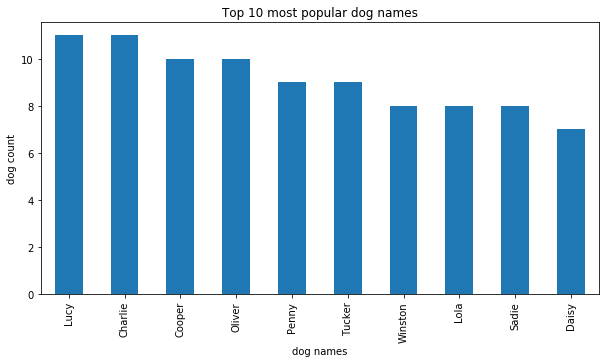

In [82]:
plt.figure(figsize=(10,5))
twitter_archive_clean['name'].value_counts()[1:11].plot(kind='bar')
plt.title('Top 10 most popular dog names')
plt.xlabel('dog names')
plt.ylabel('dog count')

We can see that the most popular name on the dataset is Lucky and Charlie with 11 dogs bearing those names each.

### 2) What source was used the most for tweeting? <a class="anchor" id="tweet-source"></a>

In [84]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

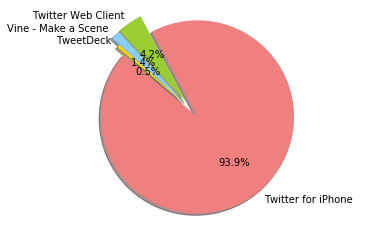

In [90]:
color =['lightcoral','yellowgreen','lightskyblue','gold']
explode =(0.1,0.1,0.1, 0) # explode first and second slice
labels = twitter_archive_clean['source'].unique()

plt.pie(twitter_archive_clean['source'].value_counts(), explode=explode, labels=labels, colors=color, autopct='%1.1f%%', 
        shadow=True, startangle=140)
plt.axis('equal')
plt.show()

We can see that 93.9% of tweet were made from iPhone with just 4.2% from Twitter web client.

### 3) correlation between retweet and favourite <a class="anchor" id="correlation"></a>

Text(0.5, 1.0, 'retweet count vs favourite count')

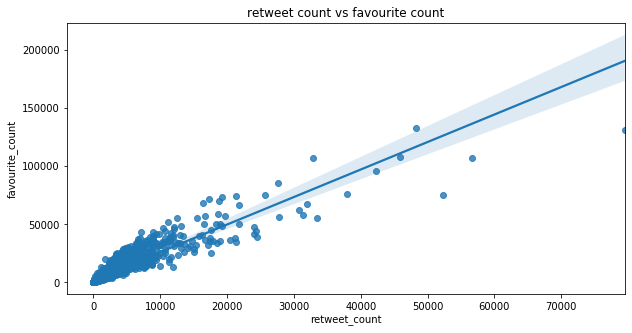

In [93]:
plt.figure(figsize=(10,5))
sns.regplot(x='retweet_count', y='favourite_count', data=twitter_archive_clean)
plt.title('retweet count vs favourite count')

There's a positive correlation between retweet count and favourite count

### Referrence:
https://gitlab.com/Medonati/udacity-data-analyst-nanodegree/-/blob/master/Project%204%3A%20Wrangle%20and%20Analyze/wrangle_act.ipynb